# Insurance Data Analysis - Exploratory Data Analysis (EDA)
This notebook demonstrates the exploratory data analysis for insurance data, focusing on:
1. Descriptive statistics for key metrics (`Total_Claim` and `Premium`).
2. Visualizations of claims and premiums by province, gender, and zipcode.
3. Analysis of premium-to-claim ratios to identify profitable segments.
4. Identification of low-risk targets for marketing optimization.


In [11]:
import pandas as pd
import numpy as np

In [12]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [13]:
from scripts.insurance_data_analysis import InsuranceDataAnalysis


In [14]:
# # Generate or load your dataset
# np.random.seed(42)
# df = pd.DataFrame({
#     'Province': np.random.choice(['A', 'B', 'C'], 1000),
#     'Zipcode': np.random.choice(['1001', '1002', '1003'], 1000),
#     'Gender': np.random.choice(['Male', 'Female'], 1000)
# })

# # Create imbalanced Total_Claim
# df['Total_Claim'] = (
#     np.random.gamma(shape=2, scale=400, size=1000) +
#     df['Province'].map({'A': 200, 'B': 100, 'C': 50}) +
#     df['Gender'].map({'Male': 50, 'Female': -50})
# )

# # Create imbalanced Premium
# df['Premium'] = (
#     np.random.normal(1000, 150, 1000) +
#     df['Province'].map({'A': 100, 'B': 200, 'C': -50}) +
#     df['Zipcode'].map({'1001': 50, '1002': -50, '1003': 100})
# )

# # Ensure no negative values
# df['Total_Claim'] = df['Total_Claim'].clip(lower=0)
# df['Premium'] = df['Premium'].clip(lower=0)



In [15]:
# df.to_csv('../data/insurance_data.csv')

In [16]:
df=pd.read_csv('../data/insurance_data.csv')

In [17]:
df

,Unnamed: 0,Province,Zipcode,Gender,Total_Claim,Premium
0,0,C,1003,Female,652.740226,898.493109
1,1,A,1003,Female,1159.389368,1040.563548
2,2,C,1003,Male,729.641413,1137.593249
3,3,C,1003,Female,253.524198,764.332164
4,4,A,1001,Male,938.056933,1349.828367
...,...,...,...,...,...,...
995,995,B,1001,Female,1099.492601,1115.364997
996,996,B,1003,Female,877.886857,1250.101777
997,997,C,1002,Female,776.679394,1090.145906
998,998,C,1003,Male,649.706237,1109.161280


In [18]:
analysis = InsuranceDataAnalysis(df)

## Descriptive Statistics
This section provides summary statistics for `Total_Claim` and `Premium` across various segments like province and gender.


In [19]:
# Generate descriptive statistics
grouped_stats = analysis.descriptive_statistics()
grouped_stats


,Province,Gender,Avg_Total_Claim,Avg_Premium,Count
0,A,Female,954.963478,1138.268025,176
1,A,Male,1039.683077,1136.346317,179
2,B,Female,904.853268,1242.241531,170
3,B,Male,1024.256636,1223.969924,156
4,C,Female,739.589271,956.303706,165
5,C,Male,917.088046,968.125168,154


## Visualizations
Visualize `Total_Claim` and `Premium` distributions across different categories to identify patterns and actionable insights.


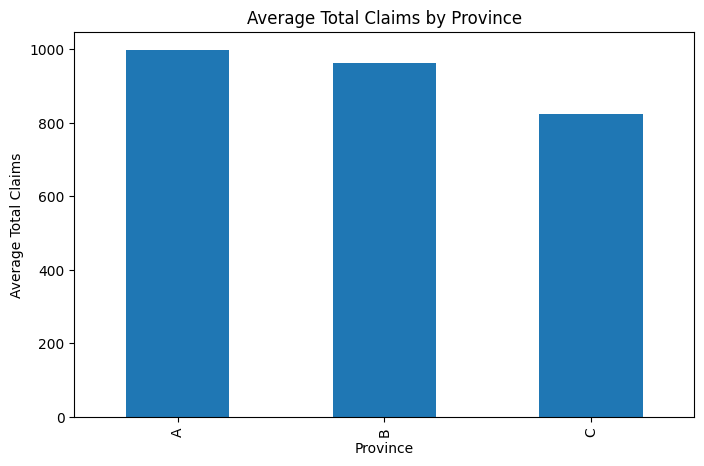

In [20]:
# Visualize total claims by province
analysis.visualize_total_claims_by_province()


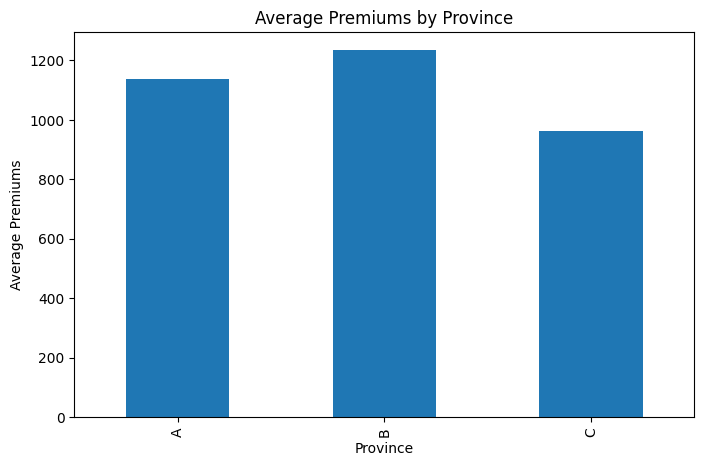

In [21]:
# Visualize premiums by province
analysis.visualize_premiums_by_province()


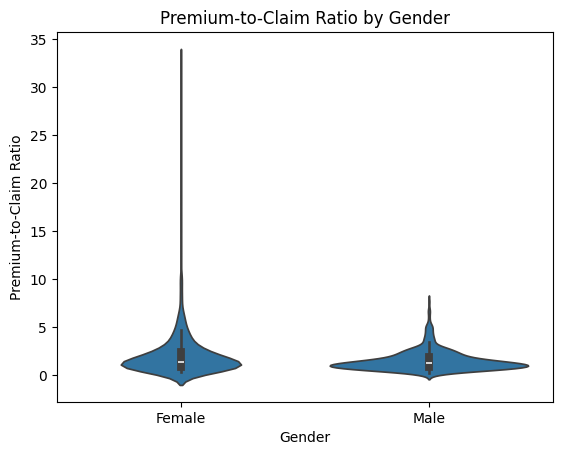

In [22]:
# Visualize premium-to-claim ratio by gender
analysis.visualize_premium_to_claim_ratio_by_gender()


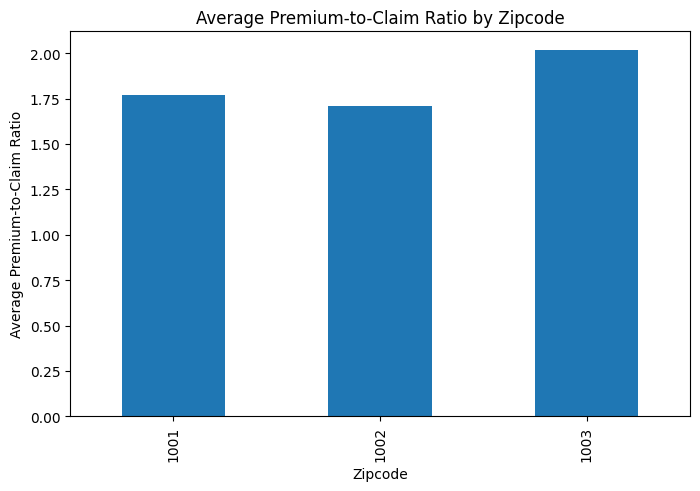

In [23]:
# Visualize premium-to-claim ratio by zipcode
analysis.visualize_premium_to_claim_ratio_by_zipcode()


## Identifying Key Segments
### 1. Profitable Segments
Segments with high premium-to-claim ratios represent profitable groups for the company.

### 2. Low-Risk Targets
Segments with below-average total claims represent potential low-risk groups for premium reductions.


## Analysis of Premium-to-Claim Ratio by Province and Gender

### Overview
This table summarizes the **Average Premium-to-Claim Ratios** (`Avg_Ratio`) and the **Customer Count** (`Count`) across different provinces and genders. These insights are crucial for identifying profitable segments and optimizing marketing strategies.

In [24]:
# Highlight profitable segments
profitable_segments = analysis.highlight_profitable_segments()
profitable_segments


,Province,Gender,Avg_Ratio,Count
0,A,Female,1.636719,176
2,B,Female,2.373550,170
3,B,Male,1.725889,156
4,C,Female,2.327555,165
5,C,Male,1.569159,154


### Key Insights

1. **Understanding Avg_Ratio:**
   - The `Avg_Ratio` reflects the average ratio of premiums paid to claims made for each segment.
   - A higher ratio indicates that premiums significantly exceed claims, signaling a profitable group for the insurer.

2. **Understanding Count:**
   - The `Count` column shows the number of customers in each segment. Segments with a high count represent a substantial customer base, providing opportunities for large-scale strategies.

### Observations

1. **Profitable Segments:**
   - **Province B (Female)** and **Province C (Female)** exhibit the highest `Avg_Ratio` values (2.37 and 2.32, respectively). These groups are highly profitable, as premiums exceed claims by more than double on average.
   - These segments could be targeted with premium reductions to attract more customers while maintaining profitability.

2. **Balanced Segments:**
   - **Province A (Female)** and **Province C (Male)** have lower `Avg_Ratio` values (1.63 and 1.57, respectively). While these groups are profitable, they are less over-insured compared to others.
   - These segments could benefit from stable premiums to ensure customer retention.

3. **Marketing Opportunities:**
   - **Province B (Male)** has a significant `Avg_Ratio` of 1.72 and a moderate customer base of 156. This segment offers opportunities for expansion through targeted marketing campaigns.

4. **High-Count Segments:**
   - Segments with high customer counts, such as **Province A (Female)** with 176 customers, provide opportunities for broader marketing campaigns or customer satisfaction initiatives.

### Strategic Recommendations

1. **Optimize Marketing for High Avg_Ratio Segments:**
   - Focus on **Province B (Female)** and **Province C (Female)** for marketing campaigns that offer premium discounts or loyalty incentives to attract more customers without risking profitability.

2. **Retention Strategies for Balanced Segments:**
   - Maintain competitive premiums for **Province A (Female)** and **Province C (Male)** to ensure customer retention and explore cross-selling opportunities.

3. **Expand in Profitable Male Segments:**
   - **Province B (Male)** offers potential for growth. Target this group with customized marketing efforts to increase market share.


## Identifying Low-Risk Targets for Premium Reduction

### Overview
This analysis aims to identify **low-risk segments**—groups with below-average total claims. These groups are potential targets for premium reductions, which can attract new clients without significantly increasing the insurer's risk exposure.

In [25]:
# Identify low-risk targets
low_risk_targets = analysis.identify_low_risk_targets()
low_risk_targets


,Province,Gender,Avg_Total_Claim
2,B,Female,904.853268
4,C,Female,739.589271
5,C,Male,917.088046


### Key Insights

1. **Understanding Low-Risk Segments:**
   - Low-risk segments are defined as groups where the average total claims (`Avg_Total_Claim`) are significantly below the overall average.
   - These groups offer opportunities for premium reductions while maintaining profitability.

2. **Highlighted Low-Risk Segments:**
   - The analysis identified the following low-risk segments:
     - **Province B (Female):** `Avg_Total_Claim = 904.85`
     - **Province C (Female):** `Avg_Total_Claim = 739.59`
     - **Province C (Male):** `Avg_Total_Claim = 917.09`
   - These segments exhibit lower-than-average total claims and present a good balance between risk and opportunity.

3. **Comparing Premiums:**
   - Despite lower claims, the premium values (`Avg_Premium`) for these segments are competitive:
     - **Province B (Female):** `Avg_Premium = 1242.24`
     - **Province C (Female):** `Avg_Premium = 956.30`
     - **Province C (Male):** `Avg_Premium = 968.13`
   - This indicates that premium reductions in these groups can attract new clients while ensuring sustained profitability.

4. **Count of Customers:**
   - Customer counts in these low-risk segments are significant, providing a substantial base for potential premium adjustments:
     - **Province B (Female):** `170 customers`
     - **Province C (Female):** `165 customers`
     - **Province C (Male):** `154 customers`

### Observations

1. **Province C Dominance:**
   - Province C, for both genders, consistently shows low `Avg_Total_Claim` values, making it an ideal region for premium adjustments.
   
2. **Balanced Premiums in Province B:**
   - Although the claims in **Province B (Female)** are low, the average premium is high, suggesting a high-profit potential. Adjustments here can attract new clients while ensuring profitability.

3. **Gender-Based Patterns:**
   - Females in **Province B** and **Province C** exhibit significantly lower average claims compared to their male counterparts, presenting an opportunity for targeted marketing strategies.

### Strategic Recommendations

1. **Target Low-Risk Segments for Premium Reductions:**
   - Focus on **Province B (Female)** and **Province C (Female and Male)** as they offer a balance of low claims and competitive premiums.

2. **Region-Specific Marketing Campaigns:**
   - Develop marketing campaigns for **Province C**, highlighting reduced premiums for both genders to attract more clients in this low-risk region.

3. **Retain Profitability in Province B:**
   - For **Province B (Female)**, carefully evaluate the impact of premium reductions on profitability before implementation.



